<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Loading Dataset**

In [35]:
data = pd.read_csv("/content/Mall_Customers.csv")

**Data Preprocessing**

In [36]:
# Top 5 Rows of Dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
# Last 5 Rows of Dataset
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
data = data.drop(["CustomerID","Gender","Age"],axis=1)

In [39]:
# Number of Rows and Columns
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  200
Number of Columns:  2


In [40]:
# Getting Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [41]:
# Data Types
data.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

**Missing Values**

In [42]:
data.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Drop Duplicates**

In [43]:
data = data.drop_duplicates()

Choosing the Annual income and Spending Score Columns

In [58]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]].values

Standard Scaler

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

WCSS -> Within Clusters Sum of Square

In [60]:
# Finding WCSS value for different number of cluster

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++",random_state=7)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

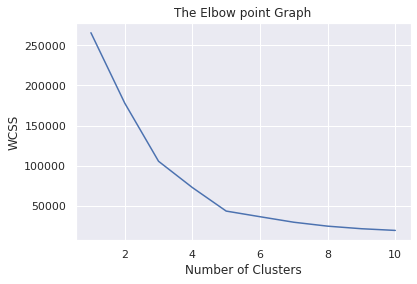

In [61]:
# Plotting an Elbow Graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Number of Cluster -> 5

Training K-Means Clustering Model

In [62]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=7)

# Return a Label for each datapoint based on cluster

Y = kmeans.fit_predict(X)
print(Y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0]


5 Cluster -> 0,1,2,3,4

Visualization all the cluster


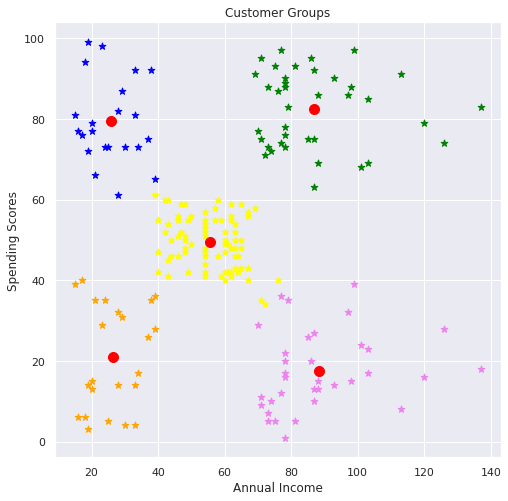

In [66]:
# Plotting all the Cluster and their Centroids

plt.figure(figsize=(8,8))

plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",marker="*",label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="orange",marker="*",label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",marker="*",label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="violet",marker="*",label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="blue",marker="*",label="Cluster 5")

# Plotting the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Scores")
plt.show()